In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr                      
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from datetime import date, time, datetime 
import pandas as pd
import netCDF4 as net

#import the file as a dataset
file = '/Users/emmagurcan/Documents/JPL_2021/aviso data/dataset-duacs-nrt-global-merged-allsat-phy-l4_1588116812229.nc'
dataset = xr.open_dataset(file)

In [2]:
#extract variables
adt = dataset['adt']
lon = dataset['longitude']
lat = dataset['latitude']
time = dataset['time']

In [3]:
#determine min and max of lon and lat
x_min = np.min(lon)
x_max = np.max(lon)
y_min = np.min(lat)
y_max = np.max(lat)

In [4]:
#time mean and standard deviation
time_mean = np.mean(adt, axis=0)
stdval = np.std(adt, axis=0)

In [5]:
#determine data from day 1
day_1 = adt[0, :, :]

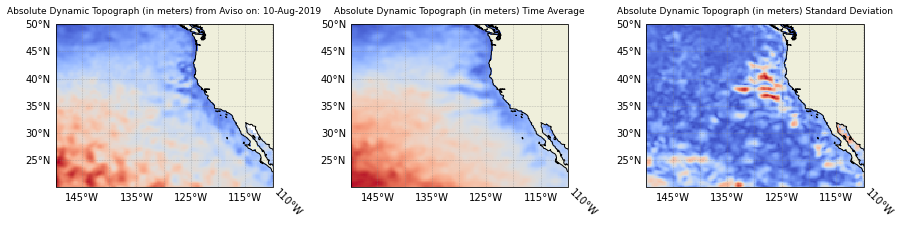

In [6]:
#making the figure with the axes
fig = plt.figure(figsize=(15.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1,  projection=ccrs.PlateCarree())
axes2 = fig.add_subplot(1, 3, 2,  projection=ccrs.PlateCarree())
axes3 = fig.add_subplot(1, 3, 3,  projection=ccrs.PlateCarree())

axes1.set_title('Absolute Dynamic Topograph (in meters) from Aviso on: 10-Aug-2019', fontsize = 9)
axes1.set_extent([x_min, x_max, y_min, y_max], crs = ccrs.PlateCarree())
gl = axes1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=.5, color='gray', alpha=0.5, linestyle='--') # include gridlines on map
gl.top_labels = False     # don't want to plot labels on top side
gl.right_labels = False 
axes1.pcolormesh(lon, lat, day_1, cmap = 'coolwarm')
axes1.add_feature(cfeature.LAND)
axes1.add_feature(cfeature.COASTLINE) 

axes2.set_title('Absolute Dynamic Topograph (in meters) Time Average', fontsize = 9)
axes2.set_extent([x_min, x_max, y_min, y_max], crs = ccrs.PlateCarree())
gl = axes2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=.5, color='gray', alpha=0.5, linestyle='--') # include gridlines on map
gl.top_labels = False     # don't want to plot labels on top side
gl.right_labels = False 
axes2.pcolormesh(lon, lat, time_mean, cmap = 'coolwarm')
axes2.add_feature(cfeature.LAND)
axes2.add_feature(cfeature.COASTLINE) 

axes3.set_title('Absolute Dynamic Topograph (in meters) Standard Deviation', fontsize = 9)
axes3.set_extent([x_min, x_max, y_min, y_max], crs = ccrs.PlateCarree())
gl = axes3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=.5, color='gray', alpha=0.5, linestyle='--') # include gridlines on map
gl.top_labels = False     # don't want to plot labels on top side
gl.right_labels = False 
axes3.pcolormesh(lon, lat, stdval, cmap = 'coolwarm')
axes3.add_feature(cfeature.LAND)
axes3.add_feature(cfeature.COASTLINE) 

plt.show()


In [7]:
#function to plot data (alongtrack, but using aviso data to test the function)
def plot_netcdf_aviso(long, lat, data, title):
    # Create plot
    plt.figure()
    fig, ax = plt.subplots(1)
    plt.pcolormesh(long, lat, data)
    
    # Colorbar Creation
    plt.colorbar()
    
    # Title Creation
    plt.title(title)
    
    plt.show()

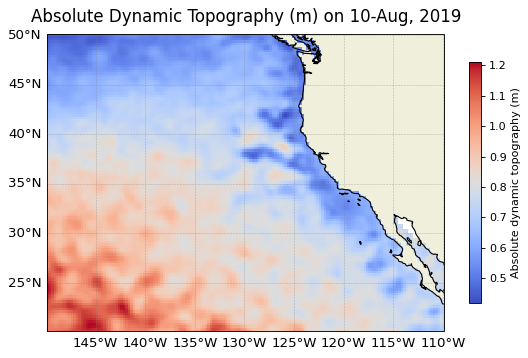

In [8]:
    # >>>------------------------> PREPARE DATA

    # Load in dataset
    dset = xr.open_dataset('/Users/emmagurcan/Documents/JPL_2021/aviso data/dataset-duacs-nrt-global-merged-allsat-phy-l4_1588116812229.nc')

    # Load in variables
    adt = dset['adt']
    long = dset['longitude']
    lat = dset['latitude']
    time = dset['time'] # in 'time' format
    
    # >>>------------------------> PLOT FIGURE
    
    # Choose a time
    index = np.where(time == np.datetime64('2019-09-19'))
    
    # Set up figure axes
    fig = plt.figure(figsize=(8, 8), dpi=80)
    
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([min(long), max(long), min(lat), max(lat)], crs=ccrs.PlateCarree())
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Plot ADT data
    x = np.squeeze(adt[index[0],:,:])
    plt.pcolormesh(long, lat, x, cmap = 'coolwarm')
    
    # Add coastlines
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE) # or... ax.coastlines()
    
    # Include colorbar, title, increase font
    cbar = plt.colorbar(shrink=0.5) 
    cbar.set_label('Absolute dynamic topography (m)', fontsize=10)
    plot_title = 'Absolute Dynamic Topography (m) on 10-Aug, 2019'
    plt.title(plot_title,fontsize=15) 
    plt.rc('font', size=12) 
    
    plt.show()

In [9]:
# Function to find Index of a Value
def near(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

In [10]:
# Time Series Plots
def time_series(loni, lati, adt):
    # Find Index
    idx_x = near(lon, loni)
    idx_y = near(lat, lati)

    # Plot Figure
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()
    ax.plot(adt[:, idx_y, idx_x])

    # Axis Labels
    x_axis = 'Time (days)'
    y_axis = 'Absolute Dynamic Topography (meters)'
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)

    # Plot Title
    plot_title = 'Time Series for Longitude: ' + str(loni) + ' and Latitude: '+ str(lati)
    plt.title(plot_title, fontsize=20)
    plt.show()
    

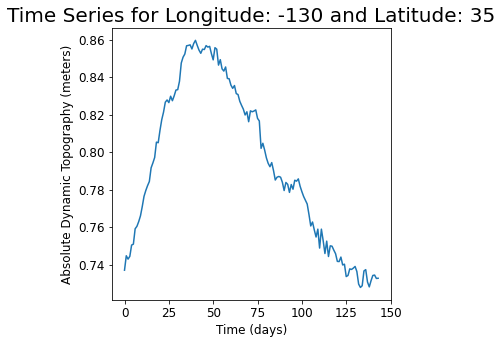

In [11]:
loni = -130
lati = 35
time_series(loni, lati, adt)

In [12]:
# Hovmoller Plots
def hovmoller_plot_given_lat(dataset, desired_lat):
    # Variables
    lat = dataset['latitude']
    desired_idx = near(lat, desired_lat)
    lon = dataset.variables['longitude'][:]
    time = dataset.variables['time'][:]
    adt = dataset['adt'][:, desired_idx, :]

    # Plot Figure
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot()
    plt.pcolormesh(lon, time, adt)

    # Axis Labels
    x_axis = 'Longitude (degrees)'
    y_axis = 'Time (days)'
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)

    # Plot Title
    plot_title = 'Absolute Dynamic Topography (m) at Latitude {lat}'
    plt.title(plot_title.format(lat=desired_lat), fontsize=20)

    # Colorbar
    plt.colorbar(shrink=0.9)

    plt.show()


<ipython-input-12-920b128d901f>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon, time, adt)


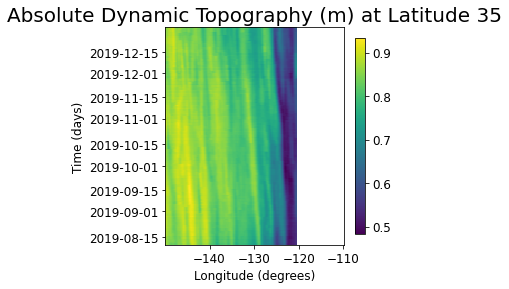

In [13]:
hovmoller_plot_given_lat(dataset, 35)